In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [385]:
boston=pd.read_csv("C:\Min\개인공부\BDA 6기\데이터\Boston_house.csv")

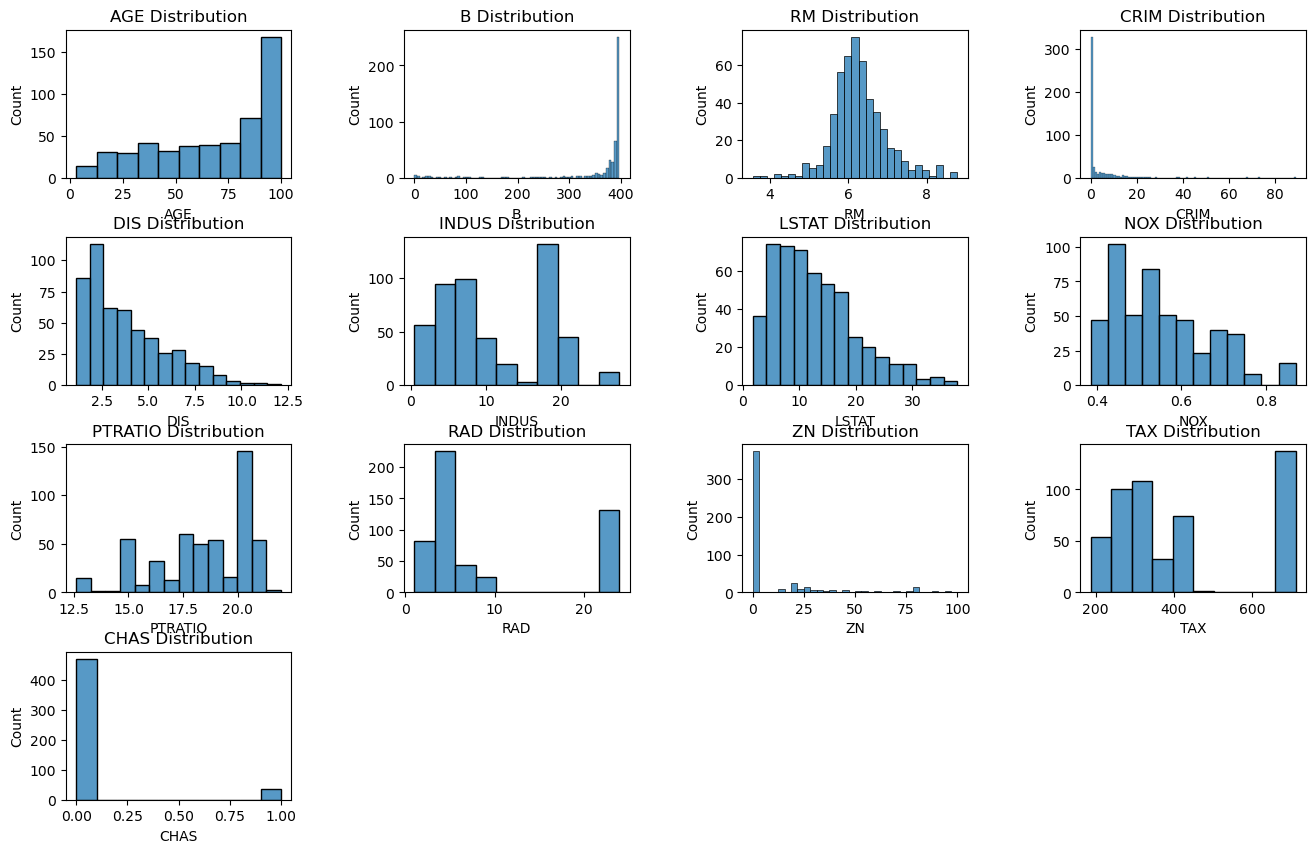

In [386]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid=gridspec.GridSpec(4,4)
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX','CHAS']

for idx, feature in enumerate(bst_feature):
    ax=plt.subplot(grid[idx])
    sns.histplot(x=boston[feature],
               ax=ax)
    ax.set_title(f'{feature} Distribution')

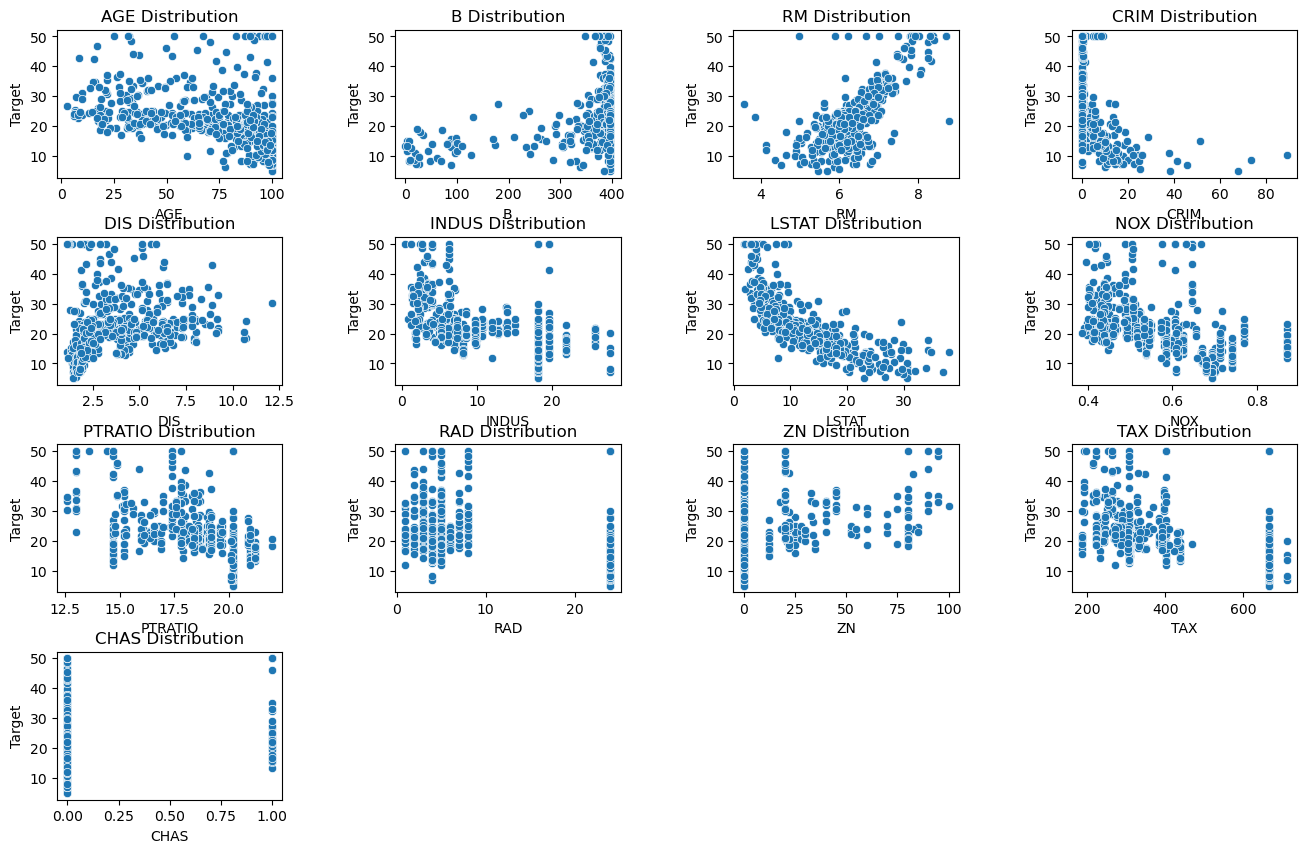

In [387]:
# 변수 선택
# y값과 변수들간의 관계
# 회귀를 선형적인 관계를 찾는 것
# 실제 Target과 변수들의 관계를 확인해보자

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid=gridspec.GridSpec(4,4)
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax=plt.subplot(grid[idx])
    sns.scatterplot(x=feature,
                   y='Target',
                   data=boston, 
                   ax=ax)
    ax.set_title(f'{feature} Distribution')
    
    
#선형적인 관계 (y값과 다른 변수들의 관계를 시각화로 확인)
#눈으로 확인하는 것 외에 상관계수

In [388]:
#이진변수 제거
boston=boston.drop('CHAS', axis=1)

In [389]:
#오른쪽 skew 로그변환
import numpy as np

sk=['CRIM', 'DIS', 'LSTAT', 'NOX', 'ZN', 'RAD']
for i in sk:
    boston[i]=np.log1p(boston[i])

In [391]:
#독립변수만 추출
boston_x=boston.drop('Target', axis=1)

In [392]:
#종속변수만 추출
boston_y=boston['Target']

In [393]:
boston_x.describe()
#눈에 띄는 이상치 없음

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,0.813418,1.479648,11.136779,2.475610,0.438587,18.455534,2.054483,0.953873,408.237154
std,28.148861,91.294864,0.702617,1.022731,0.413390,6.860353,0.539033,0.072948,2.164946,0.751839,1.620831,168.537116
min,2.900000,0.320000,3.561000,0.006300,0.755934,0.460000,1.004302,0.325700,12.600000,0.693147,0.000000,187.000000
25%,45.025000,375.377500,5.885500,0.078853,1.131459,5.190000,2.073162,0.370874,17.400000,1.609438,0.000000,279.000000
50%,77.500000,391.440000,6.208500,0.228336,1.436855,9.690000,2.514464,0.430483,19.050000,1.791759,0.000000,330.000000
75%,94.075000,396.225000,6.623500,1.542674,1.822659,18.100000,2.887869,0.484892,20.200000,3.218876,2.602690,666.000000
max,100.000000,396.900000,8.780000,4.499545,2.574633,27.740000,3.662792,0.626473,22.000000,3.218876,4.615121,711.000000


In [394]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.3, random_state=123)

In [395]:
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# 사이즈 맞는거 확인

(354, 12)

(354,)

(152, 12)

(152,)

In [396]:
x_train.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX'],
      dtype='object')

In [397]:
#스케일링 진행
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM.fit(x_train[x_train.columns])
x_train[x_train.columns]=MM.transform(x_train[x_train.columns])
x_test[x_test.columns]=MM.transform(x_test[x_test.columns])

In [399]:
train=x_train.copy()

In [400]:
train['Target']=y_train

In [404]:
x_train.reset_index(drop=True)
x_test.reset_index(drop=True)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX
0,1.000000,0.005749,0.425252,0.878373,0.059189,0.646628,0.533108,0.464561,0.808511,1.000000,0.000000,0.914122
1,0.532979,0.988401,0.594307,0.009548,0.510489,0.147727,0.385373,0.135705,0.627660,0.274435,0.000000,0.114504
2,0.622340,0.975818,0.824748,0.004954,0.536140,0.105205,0.211165,0.121439,0.244681,0.434968,0.659684,0.055344
3,0.868085,0.734354,0.404144,0.569633,0.171025,0.646628,0.649658,0.500366,0.808511,1.000000,0.000000,0.914122
4,0.098936,1.000000,0.661115,0.004032,0.768552,0.037023,0.270172,0.026616,0.468085,0.274435,0.988999,0.410305
...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.338298,0.882874,0.273431,0.284806,0.268829,0.346041,0.611034,0.350436,0.617021,0.362783,0.000000,0.223282
148,0.722340,0.991553,0.550736,0.005715,0.352574,0.108138,0.461456,0.227785,0.553191,0.160534,0.000000,0.158397
149,1.000000,0.860558,0.356894,0.201018,0.098851,0.700880,0.628451,1.000000,0.223404,0.434968,0.000000,0.412214
150,0.571277,0.061350,0.440744,0.573006,0.179690,0.646628,0.687685,0.436922,0.808511,1.000000,0.000000,0.914122


In [405]:
train.reset_index(drop=True)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,Target
0,0.487234,0.984543,0.799768,0.041783,0.503168,0.238270,0.387887,0.170529,0.638298,0.274435,0.659684,0.068702,35.2
1,0.160638,1.000000,0.571263,0.008756,0.711925,0.189883,0.316424,0.112287,0.446809,0.362783,0.669764,0.106870,25.0
2,0.597872,1.000000,0.500194,0.011966,0.281082,0.073314,0.509846,0.225513,0.553191,0.274435,0.000000,0.011450,36.2
3,0.912766,0.970220,0.529822,0.399800,0.244438,0.646628,0.722041,0.701666,0.808511,1.000000,0.000000,0.914122,16.1
4,0.990426,1.000000,0.577847,0.626947,0.083112,0.646628,0.793985,0.617725,0.808511,1.000000,0.000000,0.914122,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.328723,0.991502,0.824748,0.014658,0.404760,0.089076,0.195693,0.126357,0.574468,0.160534,0.000000,0.169847,43.8
350,0.931915,0.998260,0.566034,0.391647,0.233967,0.646628,0.750278,0.500366,0.808511,1.000000,0.000000,0.914122,16.7
351,0.467021,1.000000,0.480248,0.064196,0.538709,0.253666,0.440231,0.236857,0.744681,0.434968,0.000000,0.190840,20.4
352,1.000000,1.000000,0.382455,0.514460,0.096445,0.646628,0.835035,0.675906,0.808511,1.000000,0.000000,0.914122,11.3


In [407]:
#다중회귀분석
import statsmodels.api as sm

model=sm.OLS.from_formula('Target~'+'+'.join(x_train.columns), data=train)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          3.84e-115
Time:                        18:45:39   Log-Likelihood:                -996.08
No. Observations:                 354   AIC:                             2018.
Df Residuals:                     341   BIC:                             2068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.2462      2.978     12.170      0.000      30.388      42.104
AGE            1.0811      1.347      0.803      0.423      -1.568       3.730
B              1.5011      1.166      1.288      0.199      -0.792       3.794
RM            18.9205      2.339      8.090      0.000      14.321      23.521
CRIM          -4.8880      2.304     -2.121      0.035      -9.420      -0.356
DIS          -13.5150      2.168     -6.234      0.000     -17.779      -9.251
INDUS          1.4342      1.750      0.820      0.413      -2.007       4.876
LSTAT        -26.1706      2.021    -12.951      0.000     -30.145     -22.196
NOX           -7.0935      2.069     -3.429      0.001     -11.162      -3.025
PTRATIO       -7.7184      1.267     -6.090      0.000     -10.211      -5.225
RAD            7.4008      1.728      4.282      0.000       4.001      10.801
ZN             0.6466      0.922      0.701      0.484      -1.167       2.460
TAX           -5.3259      1.781     -2.990      0.003      -8.829      -1.822
==============================================================================
Omnibus:                      108.521   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.981
Skew:                           1.279   Prob(JB):                     1.29e-95
Kurtosis:                       7.805   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [408]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif['features']=x_train.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif


,VIF factor,features
0,3.013148,ZN
1,8.735076,CRIM
2,12.909611,INDUS
3,14.050281,PTRATIO
4,15.148879,NOX
5,15.741507,DIS
6,17.737871,TAX
7,18.407782,RM
8,18.441334,B
9,19.759154,AGE


In [409]:
#B(흑인 비율) 제거 (회귀분석 시 유의미한 변수 아님을 발견, 다중공선성 높음, 집값에 흑인 비율이 큰 영향을 주지 않을 거라 생각됨)
model=sm.OLS.from_formula('Target~'+'+'.join(['AGE', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX']), data=train)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          7.41e-116
Time:                        18:47:13   Log-Likelihood:                -996.94
No. Observations:                 354   AIC:                             2018.
Df Residuals:                     342   BIC:                             2064.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.1964      2.567     14.881      0.000      33.148      43.245
AGE            1.2308      1.343      0.917      0.360      -1.411       3.872
RM            18.5057      2.319      7.981      0.000      13.945      23.066
CRIM          -5.4482      2.265     -2.405      0.017      -9.903      -0.993
DIS          -13.6783      2.166     -6.314      0.000     -17.939      -9.417
INDUS          1.3735      1.751      0.785      0.433      -2.070       4.817
LSTAT        -26.6522      1.988    -13.409      0.000     -30.562     -22.743
NOX           -7.2066      2.069     -3.484      0.001     -11.276      -3.138
PTRATIO       -7.6398      1.267     -6.029      0.000     -10.132      -5.147
RAD            7.4075      1.730      4.282      0.000       4.005      10.810
ZN             0.6793      0.923      0.736      0.462      -1.135       2.494
TAX           -5.4080      1.782     -3.035      0.003      -8.913      -1.904
==============================================================================
Omnibus:                      106.963   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.403
Skew:                           1.268   Prob(JB):                     5.13e-92
Kurtosis:                       7.698   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [410]:
#x_train 데이터셋에서도 제거
x_train=x_train.drop('B',axis=1)

In [411]:
#B 빼고 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif['features']=x_train.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,3.000280,ZN
1,8.286419,CRIM
2,12.821232,INDUS
3,13.560395,PTRATIO
4,14.702341,DIS
5,14.897152,NOX
6,16.326146,RM
7,17.617929,TAX
8,19.449777,AGE
9,22.082923,LSTAT


In [412]:
#회귀분석 시 age 변수 유의미하지 않음 발견, 다중공선성 비교적 높음
#age 제외 후 회귀분석 
model=sm.OLS.from_formula('Target~'+'+'.join([ 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX']), data=train)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          9.09e-117
Time:                        18:47:42   Log-Likelihood:                -997.37
No. Observations:                 354   AIC:                             2017.
Df Residuals:                     343   BIC:                             2059.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.4319      2.553     15.052      0.000      33.410      43.454
RM            19.0839      2.231      8.556      0.000      14.697      23.471
CRIM          -5.5554      2.261     -2.457      0.015     -10.003      -1.107
DIS          -14.3563      2.036     -7.052      0.000     -18.360     -10.352
INDUS          1.3989      1.750      0.799      0.425      -2.043       4.841
LSTAT        -25.9626      1.839    -14.115      0.000     -29.580     -22.345
NOX           -6.7943      2.019     -3.366      0.001     -10.765      -2.824
PTRATIO       -7.5515      1.263     -5.978      0.000     -10.036      -5.067
RAD            7.3988      1.730      4.278      0.000       3.997      10.801
ZN             0.6271      0.921      0.681      0.496      -1.184       2.438
TAX           -5.4733      1.780     -3.075      0.002      -8.974      -1.972
==============================================================================
Omnibus:                      109.841   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.949
Skew:                           1.292   Prob(JB):                     8.84e-98
Kurtosis:                       7.860   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
#다중공선성 확인
x_train=x_train.drop('AGE',axis=1)

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif['features']=x_train.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,2.958477,ZN
1,8.172090,CRIM
2,12.007394,RM
3,12.523683,NOX
4,12.761443,DIS
5,13.129147,PTRATIO
6,14.147930,TAX
7,15.256190,LSTAT
8,21.692326,RAD


In [416]:
# indus 제거
model=sm.OLS.from_formula('Target~'+'+'.join([ 'RM', 'DIS','CRIM', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX']), data=train)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          9.54e-118
Time:                        18:52:03   Log-Likelihood:                -997.70
No. Observations:                 354   AIC:                             2015.
Df Residuals:                     344   BIC:                             2054.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8565      2.496     15.566      0.000      33.947      43.766
RM            18.9458      2.223      8.524      0.000      14.574      23.318
DIS          -14.7095      1.986     -7.406      0.000     -18.616     -10.803
CRIM          -5.6763      2.255     -2.517      0.012     -10.112      -1.241
LSTAT        -25.7893      1.826    -14.127      0.000     -29.380     -22.199
NOX           -6.4506      1.971     -3.272      0.001     -10.328      -2.573
PTRATIO       -7.4772      1.259     -5.938      0.000      -9.954      -5.001
RAD            7.0900      1.685      4.208      0.000       3.776      10.404
ZN             0.5400      0.914      0.591      0.555      -1.257       2.337
TAX           -4.8312      1.587     -3.043      0.003      -7.954      -1.709
==============================================================================
Omnibus:                      108.846   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.380
Skew:                           1.280   Prob(JB):                     1.43e-96
Kurtosis:                       7.834   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_train=x_train.drop('INDUS',axis=1)

In [418]:
#ZN 제거
model=sm.OLS.from_formula('Target~'+'+'.join([ 'RM', 'CRIM','DIS', 'CRIM','LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'TAX']), data=train)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          8.15e-119
Time:                        18:54:18   Log-Likelihood:                -997.88
No. Observations:                 354   AIC:                             2014.
Df Residuals:                     345   BIC:                             2049.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9346      2.490     15.634      0.000      34.037      43.833
RM            18.9994      2.219      8.563      0.000      14.635      23.363
CRIM          -5.5480      2.243     -2.474      0.014      -9.959      -1.137
DIS          -14.2166      1.801     -7.894      0.000     -17.759     -10.674
LSTAT        -25.8503      1.821    -14.196      0.000     -29.432     -22.269
NOX           -6.5499      1.962     -3.338      0.001     -10.410      -2.690
PTRATIO       -7.7454      1.173     -6.601      0.000     -10.053      -5.437
RAD            7.0889      1.683      4.211      0.000       3.778      10.400
TAX           -4.7650      1.582     -3.012      0.003      -7.877      -1.653
==============================================================================
Omnibus:                      109.849   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.260
Skew:                           1.291   Prob(JB):                     4.59e-98
Kurtosis:                       7.871   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [420]:
x_train=x_train.drop('ZN',axis=1)

In [421]:
x_train

,RM,CRIM,DIS,LSTAT,NOX,PTRATIO,RAD,TAX
273,0.799768,0.041783,0.503168,0.387887,0.170529,0.638298,0.274435,0.068702
52,0.571263,0.008756,0.711925,0.316424,0.112287,0.446809,0.362783,0.106870
181,0.500194,0.011966,0.281082,0.509846,0.225513,0.553191,0.274435,0.011450
452,0.529822,0.399800,0.244438,0.722041,0.701666,0.808511,1.000000,0.914122
381,0.577847,0.626947,0.083112,0.793985,0.617725,0.808511,1.000000,0.914122
...,...,...,...,...,...,...,...,...
98,0.824748,0.014658,0.404760,0.195693,0.126357,0.574468,0.160534,0.169847
476,0.566034,0.391647,0.233967,0.750278,0.500366,0.808511,1.000000,0.914122
322,0.480248,0.064196,0.538709,0.440231,0.236857,0.744681,0.434968,0.190840
382,0.382455,0.514460,0.096445,0.835035,0.675906,0.808511,1.000000,0.914122


In [422]:
model=sm.OLS.from_formula('Target~'+'+'.join(x_train.columns), data=train)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          8.15e-119
Time:                        18:55:12   Log-Likelihood:                -997.88
No. Observations:                 354   AIC:                             2014.
Df Residuals:                     345   BIC:                             2049.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9346      2.490     15.634      0.000      34.037      43.833
RM            18.9994      2.219      8.563      0.000      14.635      23.363
CRIM          -5.5480      2.243     -2.474      0.014      -9.959      -1.137
DIS          -14.2166      1.801     -7.894      0.000     -17.759     -10.674
LSTAT        -25.8503      1.821    -14.196      0.000     -29.432     -22.269
NOX           -6.5499      1.962     -3.338      0.001     -10.410      -2.690
PTRATIO       -7.7454      1.173     -6.601      0.000     -10.053      -5.437
RAD            7.0889      1.683      4.211      0.000       3.778      10.400
TAX           -4.7650      1.582     -3.012      0.003      -7.877      -1.653
==============================================================================
Omnibus:                      109.849   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.260
Skew:                           1.291   Prob(JB):                     4.59e-98
Kurtosis:                       7.871   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
best_features=x_train.columns

In [424]:
train=train[best_features]

In [425]:
train['Target']=y_train

C:\Temp\ipykernel_25852\452965582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Target']=y_train


In [426]:
train=train.reset_index(drop=True)

In [428]:
train

,RM,CRIM,DIS,LSTAT,NOX,PTRATIO,RAD,TAX,Target
0,0.799768,0.041783,0.503168,0.387887,0.170529,0.638298,0.274435,0.068702,35.2
1,0.571263,0.008756,0.711925,0.316424,0.112287,0.446809,0.362783,0.106870,25.0
2,0.500194,0.011966,0.281082,0.509846,0.225513,0.553191,0.274435,0.011450,36.2
3,0.529822,0.399800,0.244438,0.722041,0.701666,0.808511,1.000000,0.914122,16.1
4,0.577847,0.626947,0.083112,0.793985,0.617725,0.808511,1.000000,0.914122,10.9
...,...,...,...,...,...,...,...,...,...
349,0.824748,0.014658,0.404760,0.195693,0.126357,0.574468,0.160534,0.169847,43.8
350,0.566034,0.391647,0.233967,0.750278,0.500366,0.808511,1.000000,0.914122,16.7
351,0.480248,0.064196,0.538709,0.440231,0.236857,0.744681,0.434968,0.190840,20.4
352,0.382455,0.514460,0.096445,0.835035,0.675906,0.808511,1.000000,0.914122,11.3


# 잔차분석

In [429]:
# 타겞값 예측 및 잔차
fitted=res1.predict(x_test[best_features])
residual=y_test-fitted

C:\Users\gram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


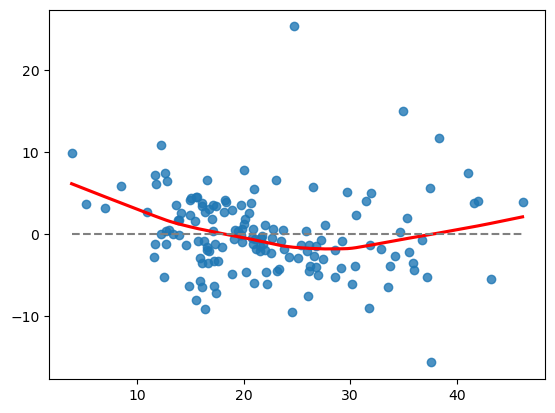

In [430]:
# 모형의 선형성 검정

sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')

# 가운데 점선에 잔차들이 가까워야 좋음
# 빨간 실선은 잔차의 추세
# 빨간 실선이 점선에 가까워야 선형성 만족

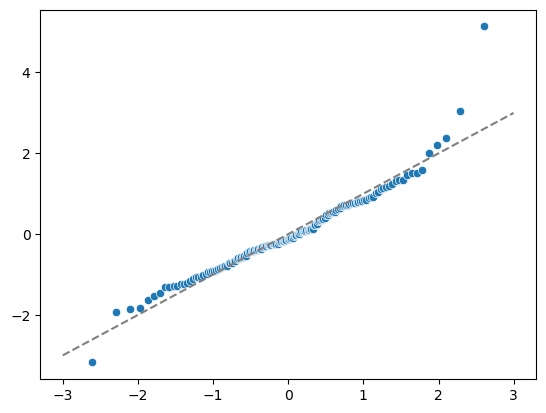

In [431]:
#정규성 검정

import scipy.stats
sr=scipy.stats.zscore(residual)
(x,y),_=scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='gray')

#점선과 가까워야 정규성 만족

C:\Users\gram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

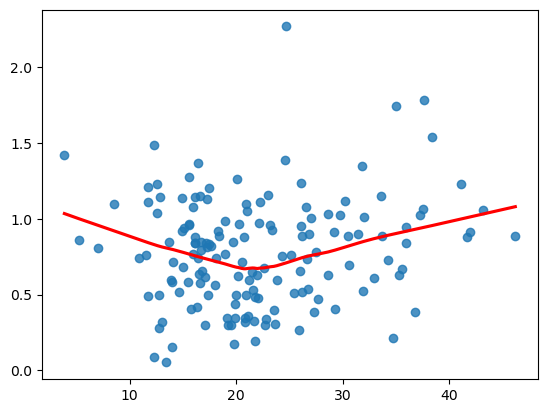

In [432]:
#잔차의 등분산성
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

#빨간색 선이 수평에 가까울수록 등분산성 만족

In [434]:
#잔차의 독립성 검정
print(res1.summary())

#더빈 왓슨 통계량이 0이면 양의 자기상관, 2이면 독립, 4이면 음의 자기상관을 갖음
#보통 1.5~2.5 이면 독립으로 판단

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          8.15e-119
Time:                        18:56:08   Log-Likelihood:                -997.88
No. Observations:                 354   AIC:                             2014.
Df Residuals:                     345   BIC:                             2049.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9346      2.490     15.634      0.0

In [435]:
#영향관측치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _=OLSInfluence(res1).cooks_distance
cd.sort_values(ascending=False).head()

368    0.443935
365    0.158849
371    0.132351
380    0.053520
412    0.047304
dtype: float64

In [436]:
from sklearn.metrics import mean_squared_error 

mean_squared_error(y_test, fitted)


24.33516201418065

In [437]:
x_test=x_test[best_features]

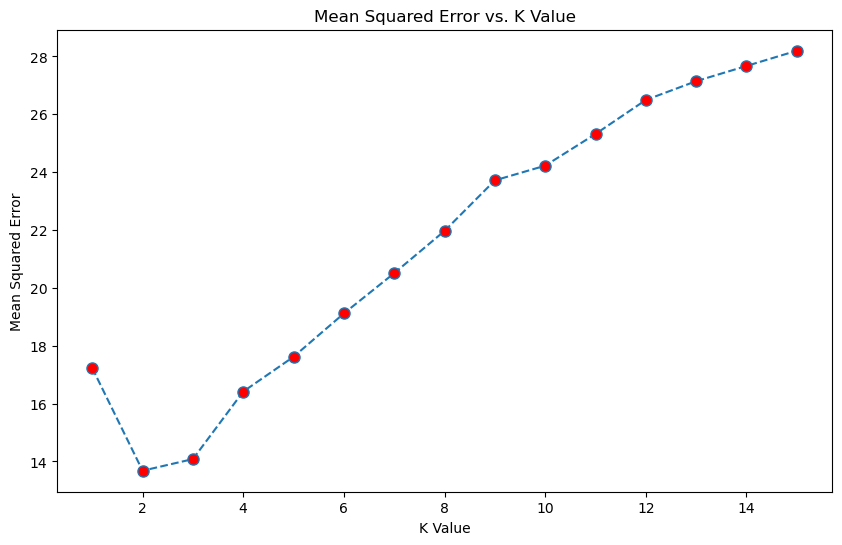

In [438]:
mse_values = []

for i in range(1, 16):
    knn_i = KNeighborsRegressor(n_neighbors=i)
    knn_i.fit(x_train, y_train)
    y_pred_i = knn_i.predict(x_test)
    mse_values.append(mean_squared_error(y_test, y_pred_i))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), mse_values, marker='o', linestyle='dashed', markersize=8, markerfacecolor='red')
plt.title("Mean Squared Error vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.show()

#k=2일 때가 적합

In [439]:
from sklearn.neighbors import KNeighborsRegressor

k = 2
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

In [440]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 13.678371710526317
R-squared: 0.8307720567502817
